In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
!apt install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [4]:
rar_path = '/content/drive/MyDrive/Dataset.rar'  # Update this with your actual .rar file path
!unrar x "{rar_path}" /content/dataset/


Streaming output truncated to the last 5000 lines.
Extracting  /content/dataset/Dataset/valid/Strawberry___Leaf_scorch/1620e450-abe8-4618-a48b-3ca16971d120___RS_L.Scorch 1241.JPG      94%  OK 
Extracting  /content/dataset/Dataset/valid/Strawberry___Leaf_scorch/167092ad-3447-4720-8c84-1f7fd5b25e7e___RS_L.Scorch 1269_flipLR.JPG      94%  OK 
Extracting  /content/dataset/Dataset/valid/Strawberry___Leaf_scorch/1672eb34-46ef-4987-a45b-7dd6e0d6a31d___RS_L.Scorch 0003.JPG      94%  OK 
Extracting  /content/dataset/Dataset/valid/Strawberry___Leaf_scorch/1a52e531-7868-4a49-b135-c4162bf6c036___RS_L.Scorch 1246.JPG      94%  OK 
Extracting  /content/dataset/Dataset/valid/Strawberry___Leaf_scorch/1c6da3dd-a49b-41aa-bf9c-0f711ea66c5d___RS_L.Scorch 1615.JPG      94%  OK 
Extracting  /content/dataset/Dataset/valid/Strawberry___Leaf_scorch/1f2a9ae4-6dfc-4429-a00d-15fa0c5c90cc___RS_L.Scorch 1379.JPG      94%  OK 
Extracting  /content/dataset/Dataset

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [9]:
cnn = tf.keras.models.Sequential()

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [19]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [20]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9034 - loss: 0.2946 - val_accuracy: 0.9386 - val_loss: 0.1883
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 203s 65ms/step - accuracy: 0.9359 - loss: 0.1990 - val_accuracy: 0.9340 - val_loss: 0.2044
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9519 - loss: 0.1473 - val_accuracy: 0.9517 - val_loss: 0.1483
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 194s 61ms/step - accuracy: 0.9634 - loss: 0.1116 - val_accuracy: 0.9440 - val_loss: 0.1773
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.9694 - loss: 0.0925 - val_accuracy: 0.9513 - val_loss: 0.1578
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9748 - loss: 0.0762 - val_accuracy: 0.9637 - val_loss: 0.1267
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 0.9786 - loss: 0.0658 - val_accuracy: 0.9583 - val_loss: 0.1383
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.9890 - loss: 0.0348
Training accuracy: 0.9901984333992004


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9658 - loss: 0.1097
Validation accuracy: 0.963464617729187


In [28]:
cnn.save('trained_plant_disease_model.keras')

In [29]:
training_history.history #Return Dictionary of history

{'accuracy': [0.9132228493690491,
  0.9397681355476379,
  0.9547478556632996,
  0.9643502235412598,
  0.9710505604743958,
  0.9757735133171082,
  0.9794579744338989,
  0.9812219738960266,
  0.9837968349456787,
  0.9850487112998962],
 'loss': [0.26483383774757385,
  0.18710070848464966,
  0.13815295696258545,
  0.10792449116706848,
  0.0888480693101883,
  0.0737253800034523,
  0.06360077112913132,
  0.05807507410645485,
  0.04975390061736107,
  0.046186480671167374],
 'val_accuracy': [0.9385954737663269,
  0.9339858889579773,
  0.9516844749450684,
  0.9440017938613892,
  0.9513430595397949,
  0.9636922478675842,
  0.9583427906036377,
  0.9603915214538574,
  0.9585704803466797,
  0.963464617729187],
 'val_loss': [0.1883080154657364,
  0.2043919414281845,
  0.14828956127166748,
  0.17734366655349731,
  0.15783287584781647,
  0.12674874067306519,
  0.13827942311763763,
  0.13050943613052368,
  0.14282582700252533,
  0.11761808395385742]}

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


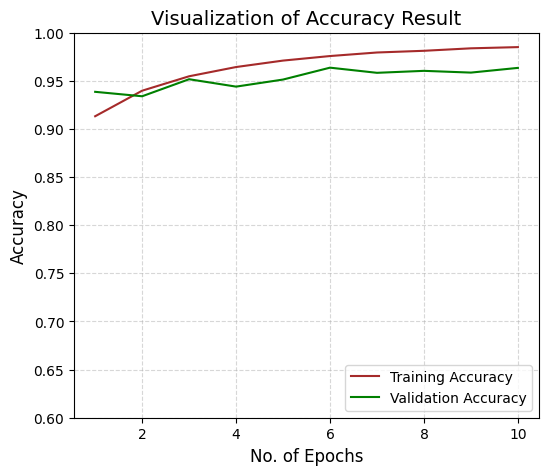

In [33]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 11)]

plt.figure(figsize=(6, 5))  # Adjust the figure size to match the first image
plt.plot(epochs, training_history.history['accuracy'], color='brown', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='green', label='Validation Accuracy')

plt.xlabel('No. of Epochs', fontsize=12)  # Adjust font size for clarity
plt.ylabel('Accuracy', fontsize=12)  # Add y-axis label for better readability
plt.title('Visualization of Accuracy Result', fontsize=14)

plt.ylim(0.6, 1.0)  # Set the y-axis limits to match the first image
plt.legend(loc='lower right')  # Adjust legend position to prevent overlap
plt.grid(True, linestyle='--', alpha=0.5)  # Optional: Add a light grid for better readability

plt.show()


In [34]:
class_name = validation_set.class_names

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step


In [38]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [39]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [42]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.95      0.91      0.93       440
                                   Apple___healthy       0.99      0.92      0.95       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.97      0.97       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.90      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.98      0.

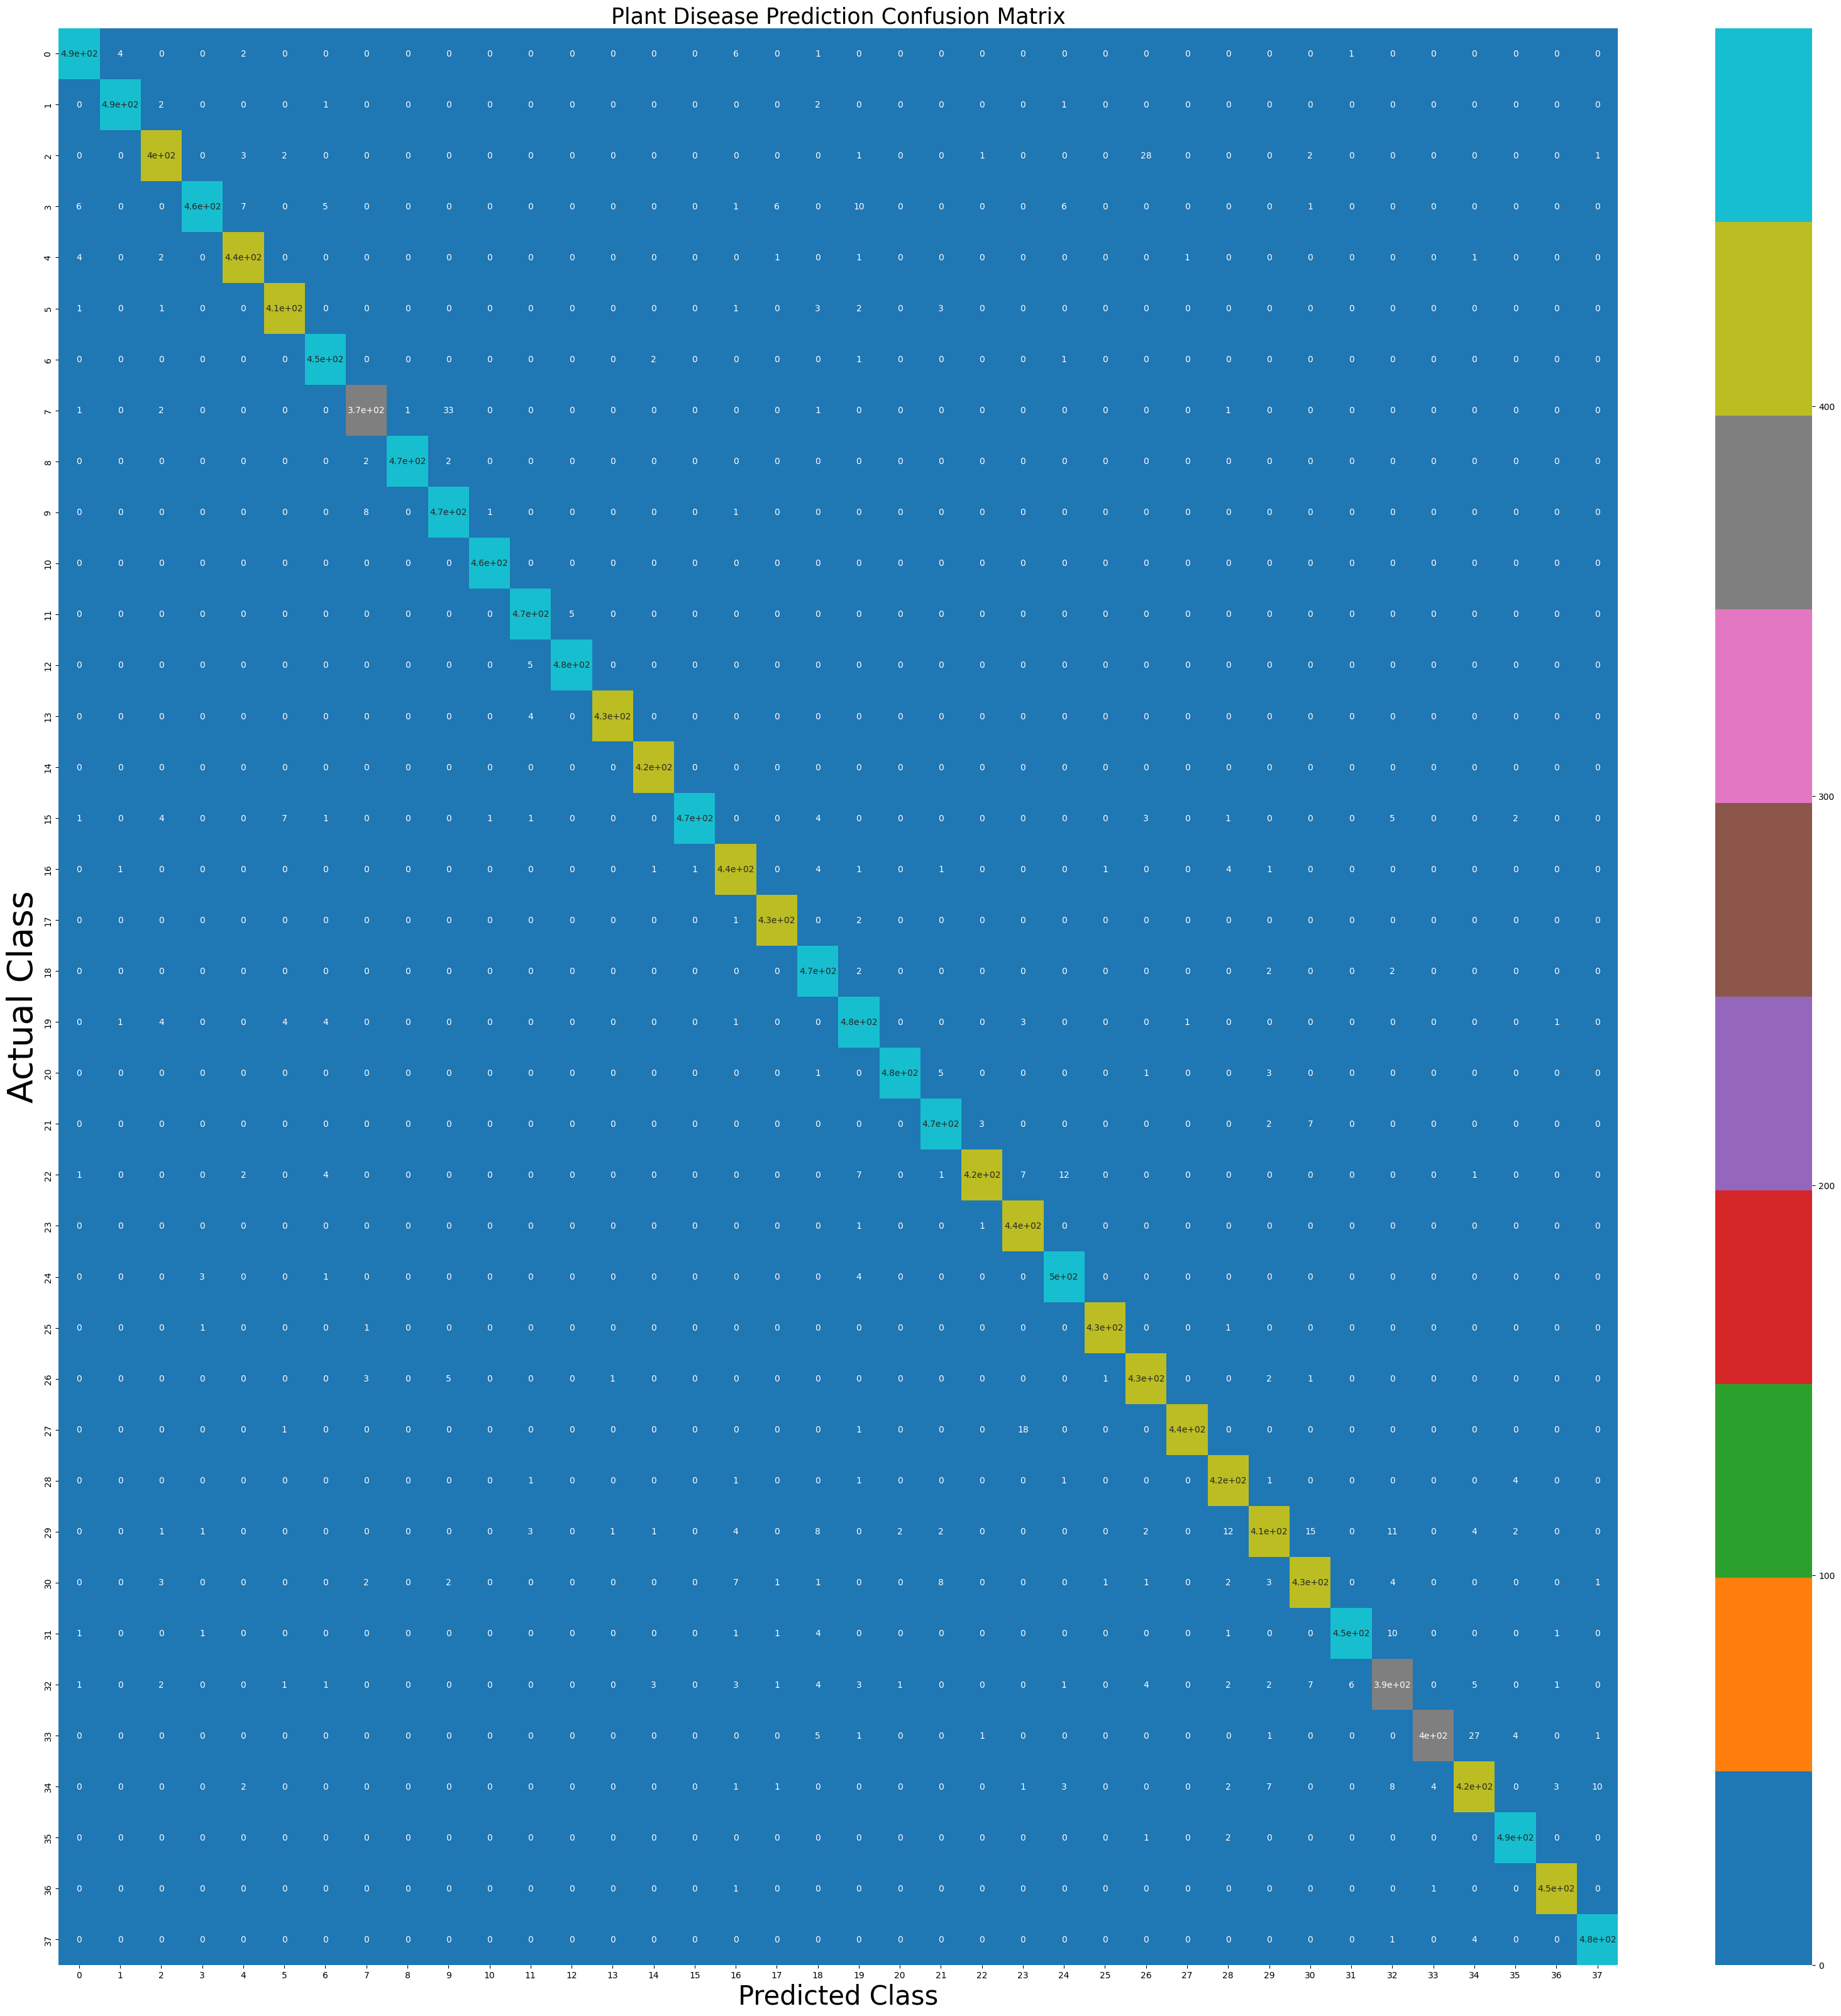

In [43]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10}, cmap='tab10')

plt.xlabel('Predicted Class',fontsize = 30)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [46]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [47]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

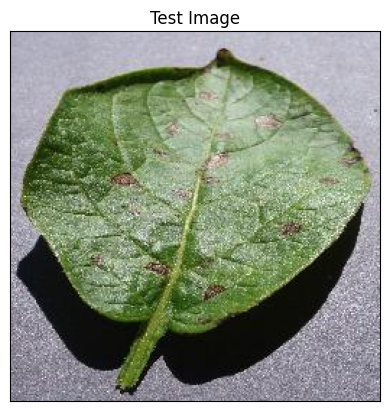

In [50]:
#Test Image Visualization
import cv2
image_path = 'dataset/Dataset/test/PotatoEarlyBlight5.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [51]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


In [52]:
print(predictions)

[[1.0067268e-04 4.8683123e-08 2.1769376e-11 1.7528866e-10 1.8796217e-07
  4.5345665e-11 8.3636548e-10 1.9906944e-11 4.9071691e-08 5.6906072e-14
  4.7723197e-16 3.9831999e-14 1.4652042e-09 9.5044556e-13 1.3355688e-15
  2.3856559e-14 8.5863067e-11 5.5224050e-12 2.7743030e-05 3.8621843e-07
  9.9986756e-01 3.4406547e-11 1.5920908e-09 1.6169803e-17 1.7830442e-12
  1.0502459e-14 3.3263637e-13 7.4734672e-12 1.4649462e-14 1.6593347e-07
  1.7385234e-07 1.0898045e-10 2.9472974e-06 3.1817175e-17 1.0216011e-11
  2.5629083e-18 1.0812796e-15 4.8263439e-13]]


In [53]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


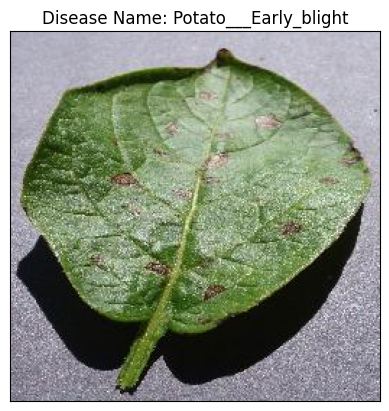

In [54]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()